In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading train and test data

In [2]:
train1 = pd.read_csv("../dataset/train.csv").drop("Unnamed: 0",1)
test1 = pd.read_csv("../dataset/test.csv").drop("Unnamed: 0",1)
print("Shape of train dataset: " + str(train1.shape))
print("Shape of test dataset: " + str(test1.shape))
train1

Shape of train dataset: (3333, 20)
Shape of test dataset: (1667, 20)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3329,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3330,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3331,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no


### Looking for NA values

In [3]:
print("NA values on train data: " + str(train1.isnull().values.sum()))
print("NA values on test data: " + str(test1.isnull().values.sum()))

NA values on train data: 0
NA values on test data: 0


### Checking balance according to target variable

In [4]:
yes = train1[train1.churn == "yes"].shape[0]
no = train1[train1.churn == "no"].shape[0]
print("Yes: " + str(yes) + " lines. " + "No: " + str(no) + " lines." + " Sum: " + str(yes + no))
print("Yes / No: " + str(yes/no))

Yes: 483 lines. No: 2850 lines. Sum: 3333
Yes / No: 0.1694736842105263


### Balacing train dataset

In [5]:
train2 = train1[train1.churn == "yes"].append(train1[train1.churn == "no"].sample(yes))
yes = train2[train2.churn == "yes"].shape[0]
no = train2[train2.churn == "no"].shape[0]
print("Yes: " + str(yes) + " lines. " + "No: " + str(no) + " lines." + " Sum: " + str(yes + no))
print("Yes / No: " + str(yes/no))

Yes: 483 lines. No: 483 lines. Sum: 966
Yes / No: 1.0


### Turning string columns into numeric

In [6]:
str_columns = train2.select_dtypes(["object"]).columns 
train2[str_columns] = train2[str_columns].apply(lambda x: x.astype("category"))
cat_columns = train2.select_dtypes(["category"]).columns 
train2[cat_columns] = train2[cat_columns].apply(lambda x: x.cat.codes)

test2 = test1
str_columns = test2.select_dtypes(["object"]).columns 
test2[str_columns] = test2[str_columns].apply(lambda x: x.astype("category"))
cat_columns = test2.select_dtypes(["category"]).columns 
test2[cat_columns] = test2[cat_columns].apply(lambda x: x.cat.codes)

### Analysing features

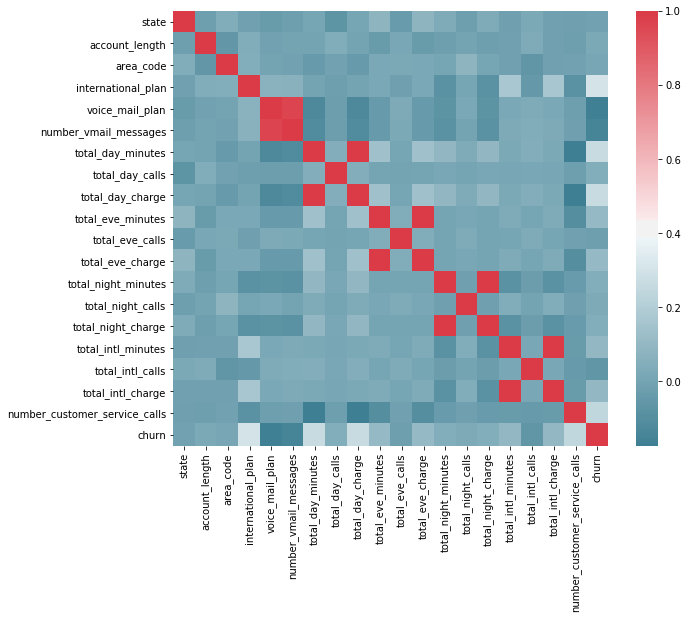

In [7]:
corr = train2.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### Removing variables with high correlation between each other

In [8]:
remove = ["voice_mail_plan", "total_day_minutes", "total_eve_minutes", "total_night_minutes", "total_intl_minutes"]
train3 = train2.drop(remove,1)
test3 = test2.drop(remove,1)

,state,account_length,area_code,international_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,26.427536,101.628364,0.995859,0.169772,7.034161,100.426501,32.393716,100.960663,17.586263,99.831263,9.135238,4.314700,2.811273,1.838509,0.500000
std,14.533735,38.138547,0.703789,0.375627,13.143523,21.236987,10.545045,20.254508,4.375955,19.713636,2.169434,2.465583,0.772680,1.589084,0.500259
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,2.130000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,76.000000,1.000000,0.000000,0.000000,86.000000,25.012500,88.000000,14.627500,86.000000,7.620000,3.000000,2.320000,1.000000,0.000000
50%,27.000000,101.000000,1.000000,0.000000,0.000000,101.000000,32.140000,101.000000,17.705000,100.000000,9.145000,4.000000,2.840000,1.000000,0.500000
75%,39.000000,125.000000,1.000000,0.000000,0.000000,115.000000,39.970000,114.000000,20.607500,114.000000,10.730000,6.000000,3.320000,3.000000,1.000000
max,50.000000,225.000000,2.000000,1.000000,48.000000,165.000000,59.640000,168.000000,30.910000,164.000000,17.190000,20.000000,5.400000,9.000000,1.000000


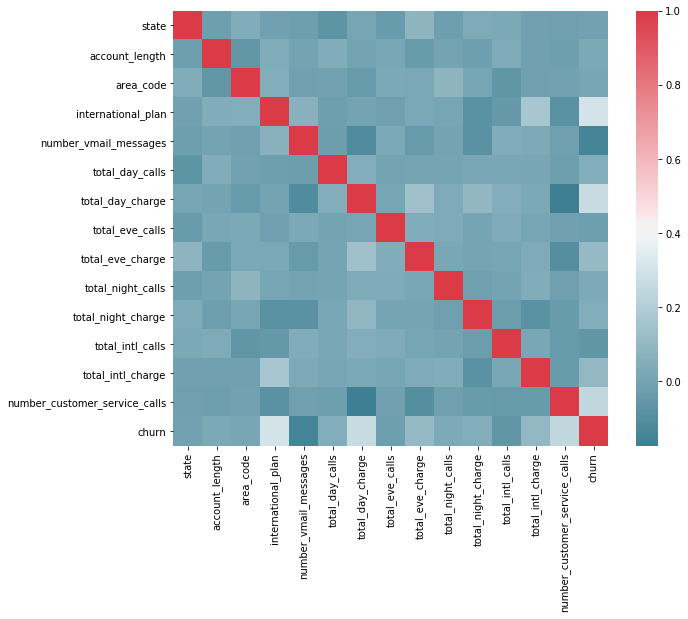

In [9]:
corr = train3.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
train3.describe()

### Analysing correlation to churn

In [10]:
abs(train3.corr(method = 'pearson')["churn"]).sort_values()

state                            0.006057
area_code                        0.014717
total_eve_calls                  0.019738
account_length                   0.027184
total_night_calls                0.028844
total_day_calls                  0.042820
total_night_charge               0.046253
total_intl_calls                 0.061331
total_intl_charge                0.101351
total_eve_charge                 0.107165
number_vmail_messages            0.146020
number_customer_service_calls    0.246373
total_day_charge                 0.263977
international_plan               0.303308
churn                            1.000000
Name: churn, dtype: float64

### Removing features with low correlation to churn

In [11]:
train4 = train3[[c for c in train3.columns if abs(train3.corr(method = 'pearson')["churn"][c]) > 0.01]] 
test4 = test3[train4.columns]


In [12]:
#sns.pairplot(train4, hue="churn", diag_kind = 'hist')

### Extracting more features

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_day_charge, dtype: object

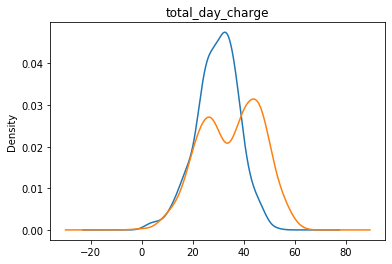

In [13]:
train4.groupby("churn").total_day_charge.plot(kind='kde', title = "total_day_charge")

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_day_charge_level, dtype: object

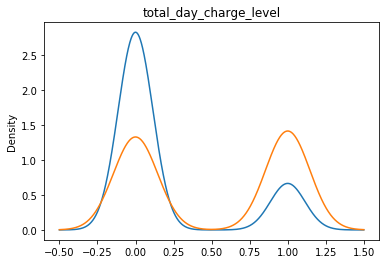

In [14]:
# Creating a new variable

def get_level(x):
    if x > 15 and x < 38:
        y = 0
    else: y = 1
    return y

train4["total_day_charge_level"] = train4["total_day_charge"].apply(get_level)
test4["total_day_charge_level"] = test4["total_day_charge"].apply(get_level)
train4.groupby("churn").total_day_charge_level.plot(kind='kde', title = "total_day_charge_level")

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: number_customer_service_calls, dtype: object

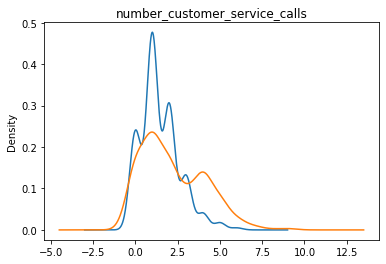

In [15]:
train4.groupby("churn").number_customer_service_calls.plot(kind='kde', title = "number_customer_service_calls")

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: number_customer_service_calls_level, dtype: object

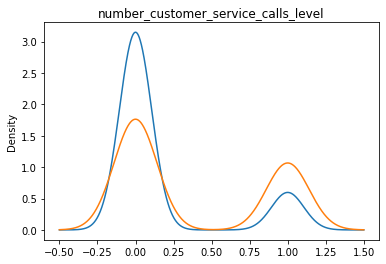

In [16]:
# Creating a new variable

def get_level(x):
    if x < 3:
        y = 0
    else: y = 1
    return y

train4["number_customer_service_calls_level"] = train4["number_customer_service_calls"].apply(get_level)
test4["number_customer_service_calls_level"] = test4["number_customer_service_calls"].apply(get_level)
train4.groupby("churn").number_customer_service_calls_level.plot(kind='kde', title = "number_customer_service_calls_level")

In [17]:
abs(train4.corr(method = 'pearson')["churn"]).sort_values()

area_code                              0.014717
total_eve_calls                        0.019738
account_length                         0.027184
total_night_calls                      0.028844
total_day_calls                        0.042820
total_night_charge                     0.046253
total_intl_calls                       0.061331
total_intl_charge                      0.101351
total_eve_charge                       0.107165
number_vmail_messages                  0.146020
number_customer_service_calls_level    0.245375
number_customer_service_calls          0.246373
total_day_charge                       0.263977
international_plan                     0.303308
total_day_charge_level                 0.340081
churn                                  1.000000
Name: churn, dtype: float64

### Boxplot

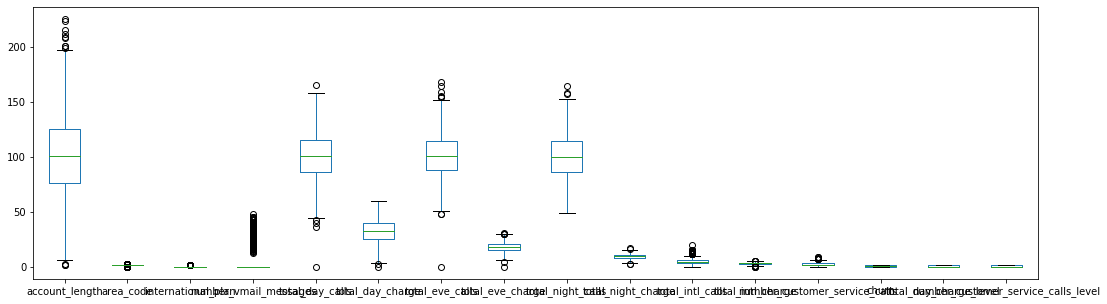

In [18]:
train4.boxplot(grid = False, figsize = (18,5))

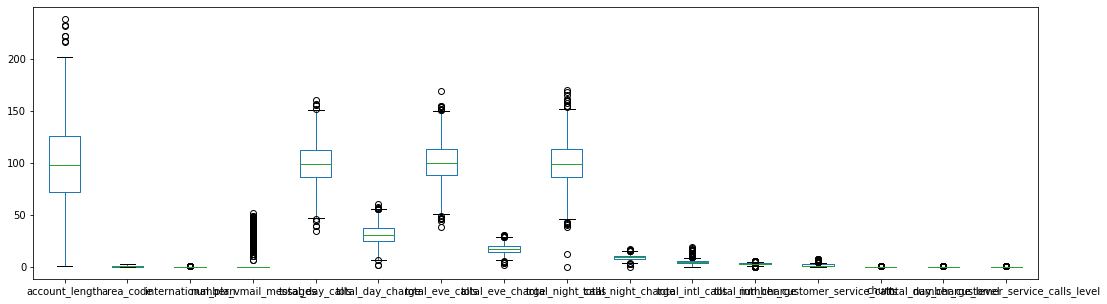

In [19]:
test4.boxplot(grid = False, figsize = (18,5))

### Saving data

In [20]:
train4.to_csv("../dataset/train_1.csv")
test4.to_csv("../dataset/test_1.csv")